In [144]:
import pandas as pd
import numpy as np
import sqlite3
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')

In [145]:
conn = sqlite3.connect('vendor_data.db')

df = pd.read_sql("SELECT * FROM vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.000000,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,42239.074419,167655.265984,0.000000,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,18793.783627,44952.773386,0.000000,289.710000,2857.800000,16059.562500,6.728193e+05


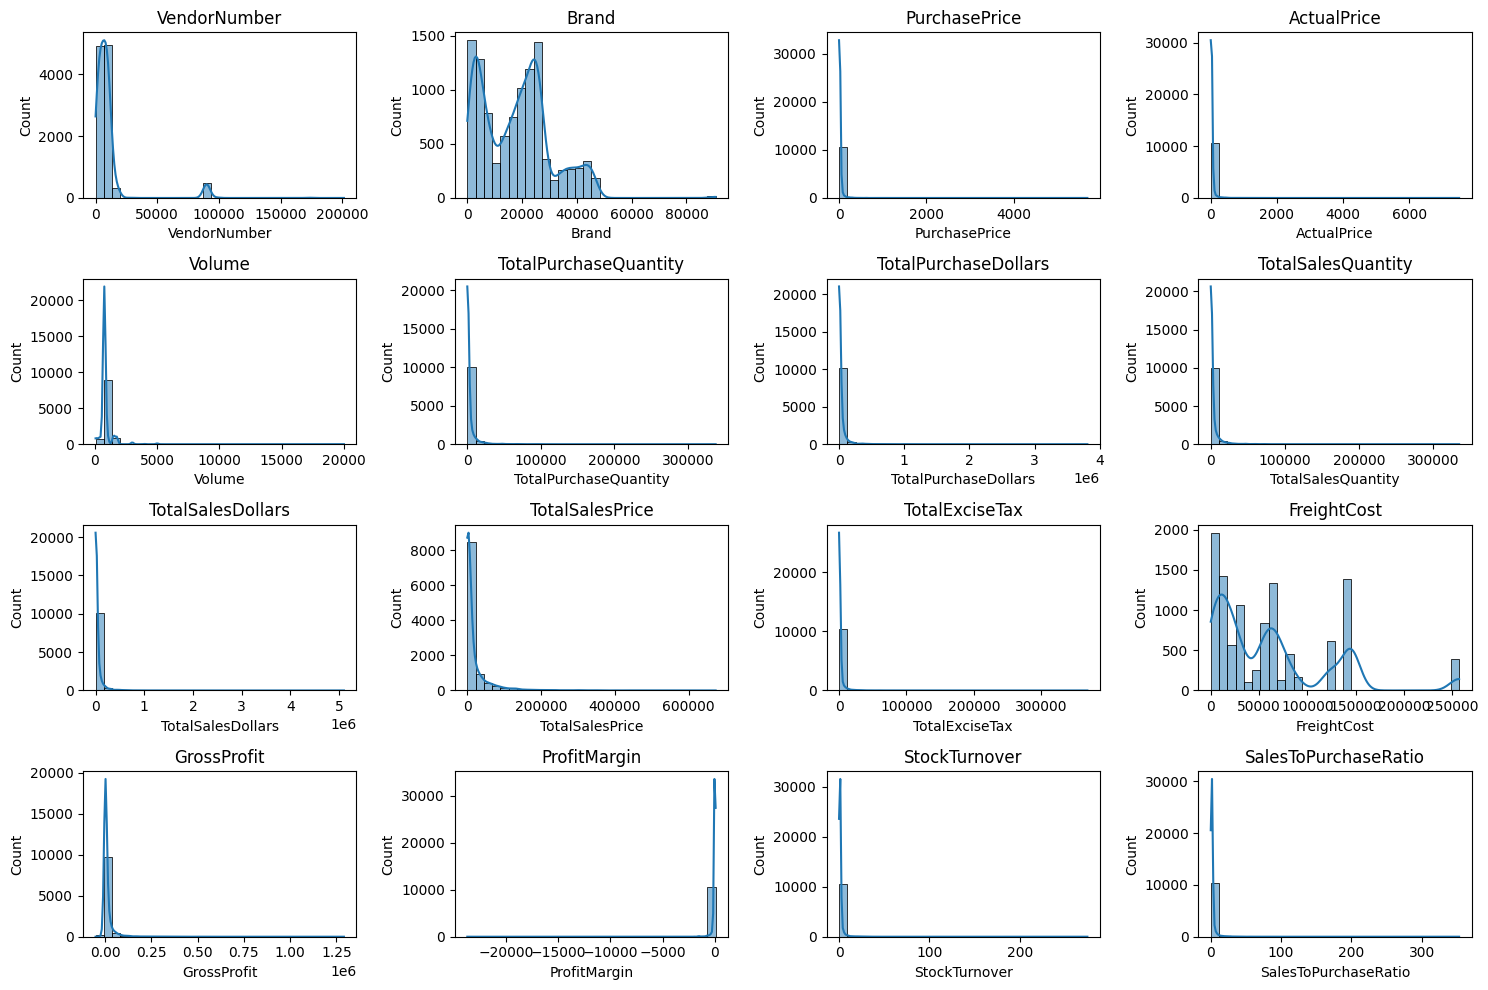

In [147]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()    

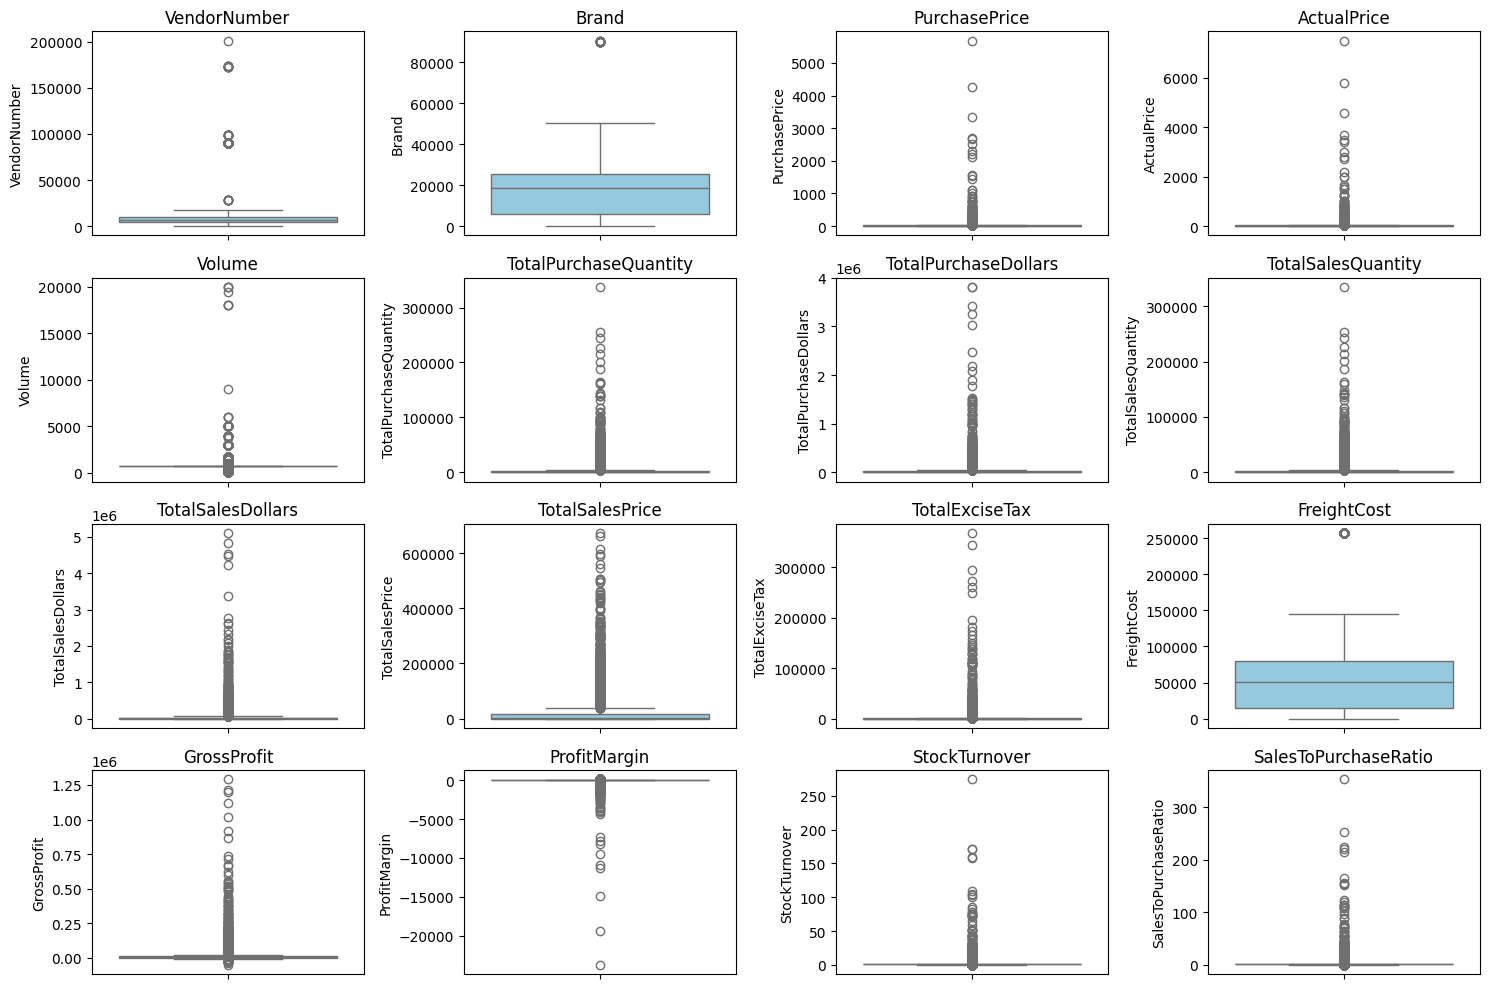

In [148]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()    

## Summary Statistics Insights
# Negative & Zero Values

Gross Profit: Minimum value -52,002.78, confirming cases of products being sold below cost or due to excessive freight charges.

Profit Margin: Extremely negative minimum (-23,730%) shows severe pricing inefficiencies or data anomalies where sales revenue is negligible relative to costs.

Total Sales Quantity & Sales Dollars: Both have 0 as minimum, meaning some products were purchased but not sold — possibly slow-moving or obsolete stock.

Stock Turnover & Sales-to-Purchase Ratio: Both have 0 minimums, indicating vendors holding unsold stock or mismatched purchase/sales timing.

# Outliers (High Std Dev vs Mean)

Purchase & Actual Price: Max values (5,681.81 & 7,499.99) are way higher than means (24.39 & 35.64), suggesting premium/luxury products skewing the distribution.

Volume: Mostly 750 units, but maximum is 20,000, showing certain bulk products disproportionately impacting averages.

Total Purchase/Sales Quantities: Maximums exceed 300,000, while medians are below 2,000, highlighting a few vendors/products dominating the volume.

Freight Cost: Extremely wide range (0.09 – 257,032) compared to mean (~61,434), suggesting logistics inefficiencies, bulk shipments, or extreme outliers.

Stock Turnover: Median is ~1, but maximum is 274.5, meaning some products sell far faster than others or sales fulfilled from older stock.

Sales-to-Purchase Ratio: Median 1.43, but maximum 352.9, suggesting data irregularities (sales recorded without corresponding purchases in this period).

# Distribution Skewness

Total Purchase & Sales Dollars: Strongly right-skewed — median much lower than mean, meaning a small number of vendors/products generate most revenue.

Gross Profit: Highly variable — large positive outliers but also extreme negatives.

Excise Tax: Max 368,242, while most values remain very small, suggesting few high-tax items.

# Key Business Takeaways

Profitability Issues: Negative profit margins and gross losses need review — could indicate discounting, mispricing, or operational inefficiencies.

Premium Products: A handful of high-priced products distort averages. Better analysis should segment by product category.

Logistics Costs: Huge spread in freight costs may point to inefficiencies — renegotiating freight contracts or optimizing shipments could save costs.

Stock Management: Zero sales and extreme stock turnover values highlight the need for better inventory planning and demand forecasting.

Data Quality Concerns: Very high Sales-to-Purchase ratios suggest some transactions may be mismatched or incomplete.

In [149]:
df = pd.read_sql('''SELECT * FROM vendor_sales_summary
                    WHERE GrossProfit > 0
                 AND ProfitMargin > 0
                 AND TotalSalesQuantity > 0''', conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


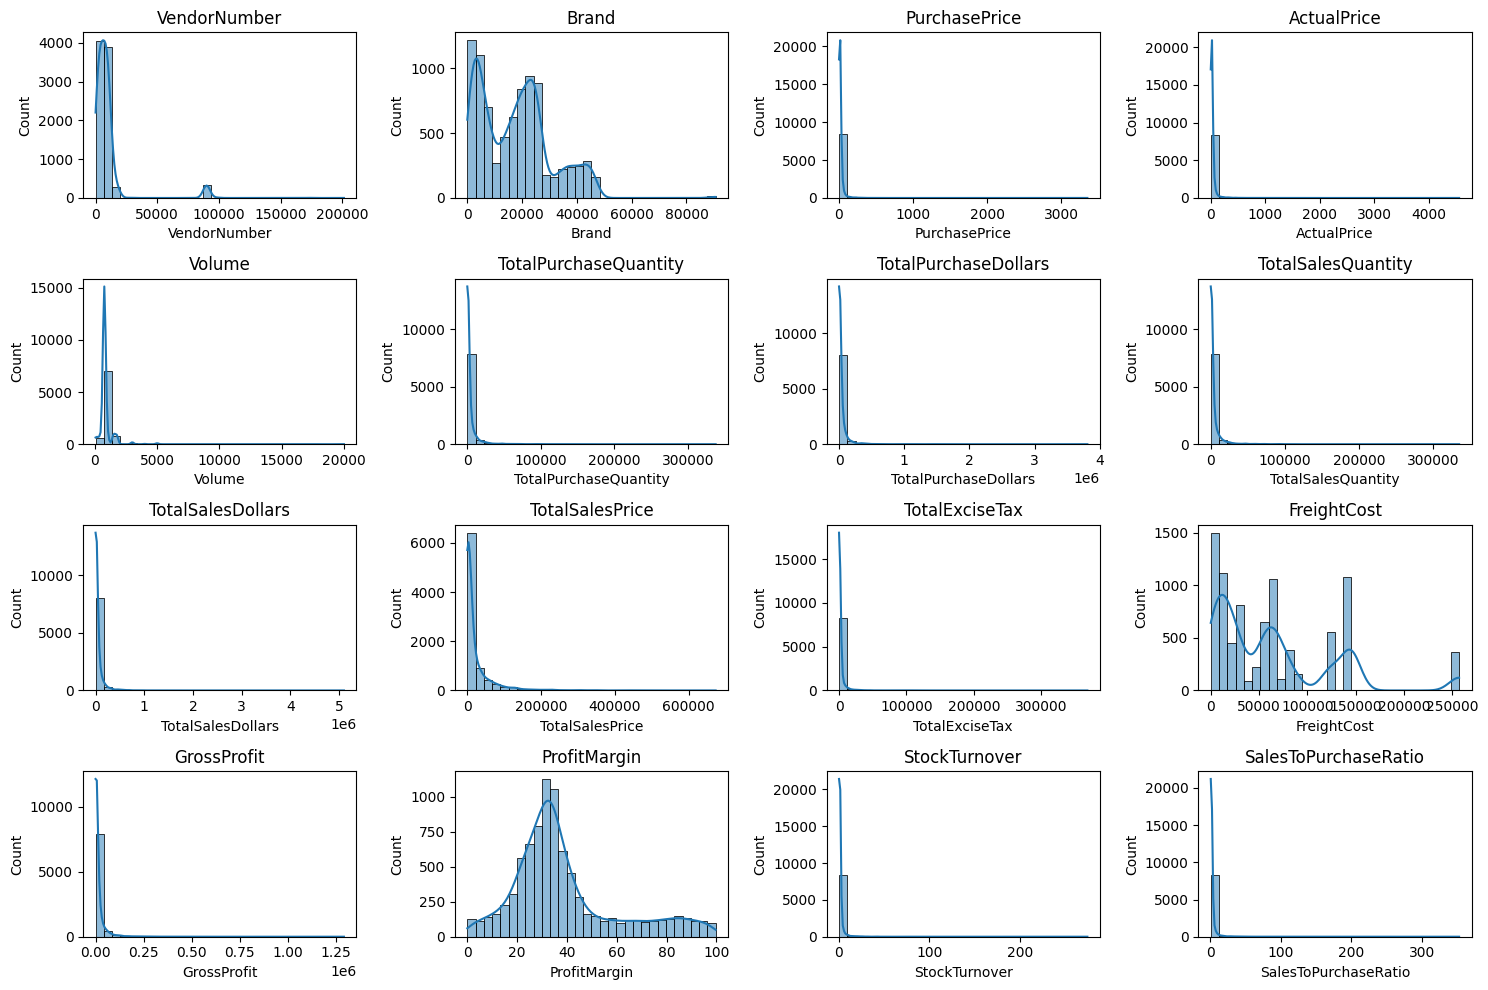

In [150]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()    

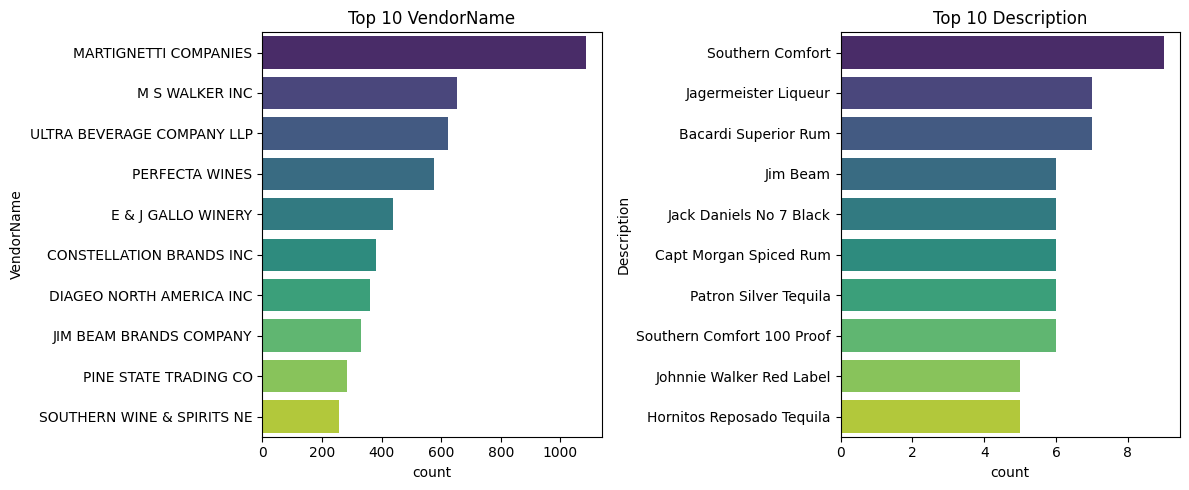

In [151]:
categorial_cols = ['VendorName', 'Description']
plt.figure(figsize=(12, 5))

for i, col in enumerate(categorial_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette='viridis')
    plt.title(f'Top 10 {col}')
plt.tight_layout()
plt.show()

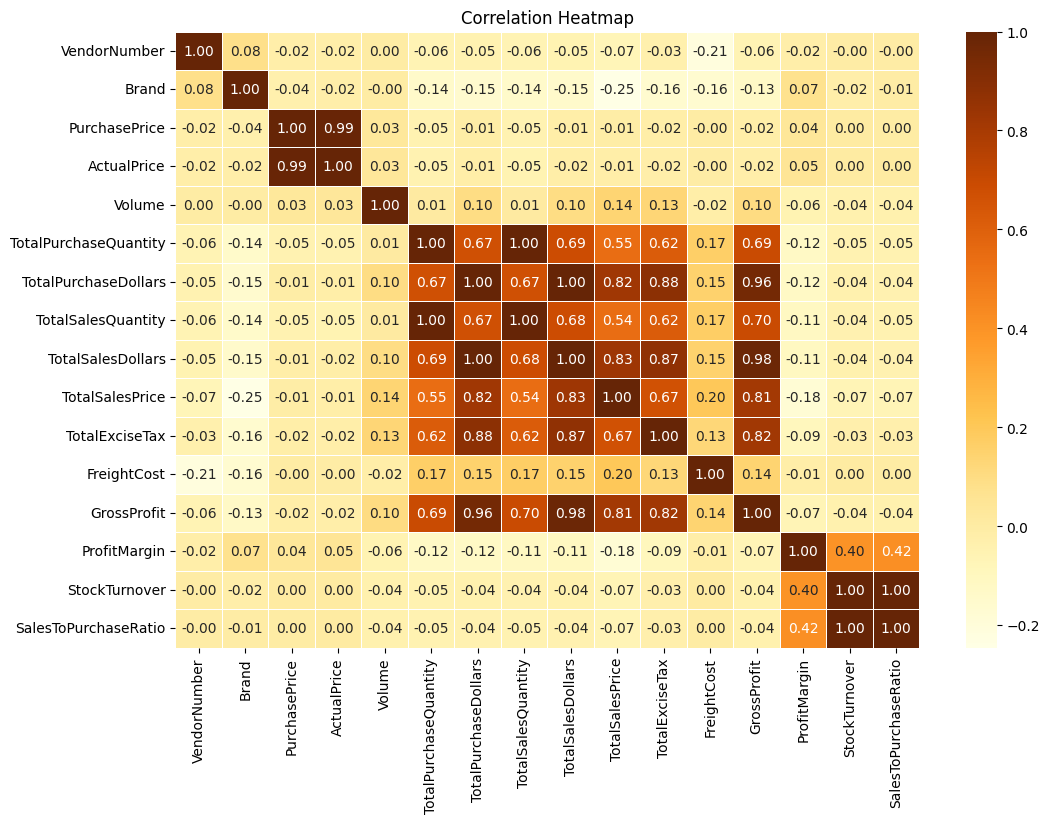

In [152]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlOrBr', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Correlation Insights

## PurchasePrice & ActualPrice

Correlation: 0.99

 Very strong positive correlation, meaning purchase and actual prices almost move together.

## TotalPurchaseQuantity & TotalSalesQuantity

Correlation: 0.99

 Nearly perfect correlation — purchased goods closely match sold goods → efficient inventory turnover.

## TotalSalesDollars & GrossProfit

Correlation: 0.98

 Very strong relationship — as sales revenue grows, gross profit increases proportionally.

## TotalSalesPrice & TotalSalesQuantity

Correlation: 0.83

 High positive correlation — more units sold leads to higher total sales price.

## ProfitMargin & SalesToPurchaseRatio

Correlation: 0.42

 Moderate correlation — better sales-to-purchase ratios are associated with healthier margins.

## FreightCost & VendorNumber

Correlation: -0.21

 Weak negative correlation — certain vendors are linked to higher or lower freight costs.

## StockTurnover vs. GrossProfit / ProfitMargin

Correlation: -0.04 to -0.07

 Weak negative effect — faster stock turnover does not guarantee higher profitability.

## Data Analysis
 
Identify brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins

In [153]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [154]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [155]:
low_sales_threshold

np.float64(560.299)

In [156]:
high_margin_threshold

np.float64(64.97017552750113)

In [157]:
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [158]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]

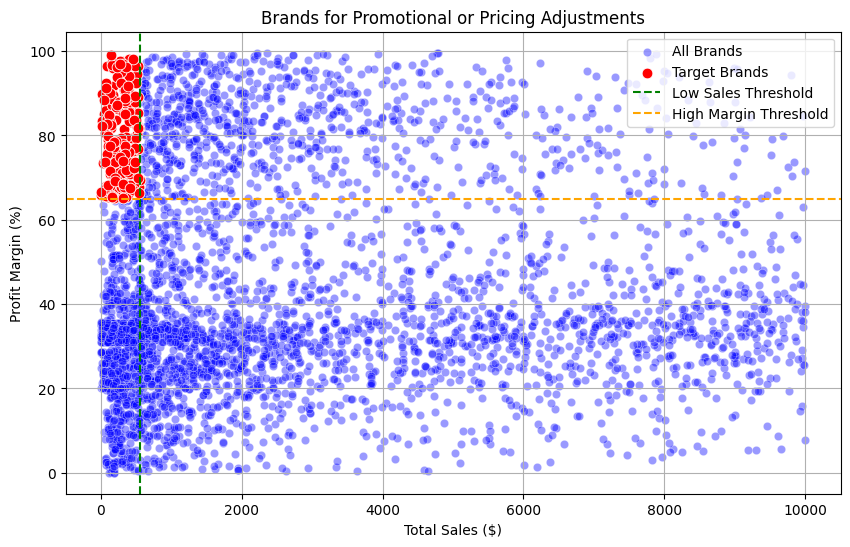

In [159]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label='All Brands', alpha=0.4)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands', s=60)

plt.axvline(low_sales_threshold, color='green', linestyle='--', label='Low Sales Threshold')
plt.axhline(high_margin_threshold, color='orange', linestyle='--', label='High Margin Threshold')

plt.title('Brands for Promotional or Pricing Adjustments')
plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstrate the highest sales performance?

In [160]:
def format_dollars(val):
    if val >= 1_000_000:
        return f"{val/1_000_000:.2f}M"
    elif val >= 1_000:
        return f"{val/1_000:.2f}K"
    else:
        return f"{val:.2f}"

In [161]:
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors.head(10)

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [162]:
top_brands.head(10)

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [163]:
top_brands.apply(lambda x: format_dollars(x)).head(10)

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

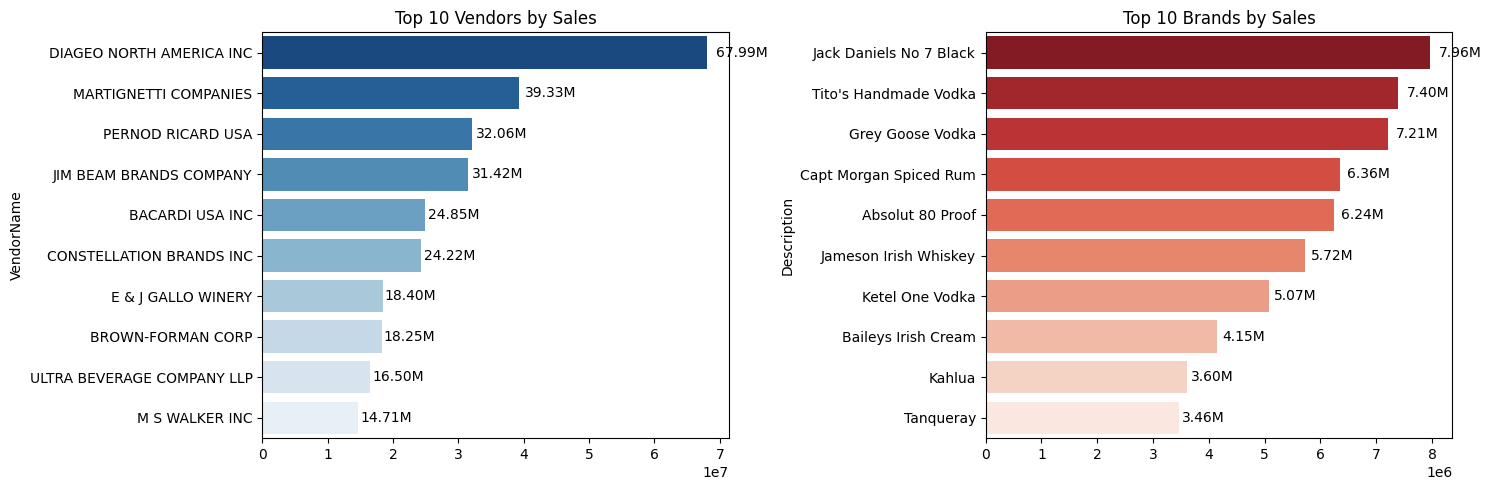

In [164]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),  
        bar.get_y() + bar.get_height() / 2,          
        format_dollars(bar.get_width()),             
        ha='left', va='center', fontsize=10, color='black'
    )

plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

Which Vendor contribute most to total purchase Dollars?

In [165]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [166]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum() * 100

In [167]:
vendor_performance =round(vendor_performance.sort_values('TotalPurchaseDollars', ascending=False).head(10),2)

In [168]:
top_vendors = vendor_performance.head(10)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [169]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [170]:
top_vendors['CumultiveContribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,CumultiveContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


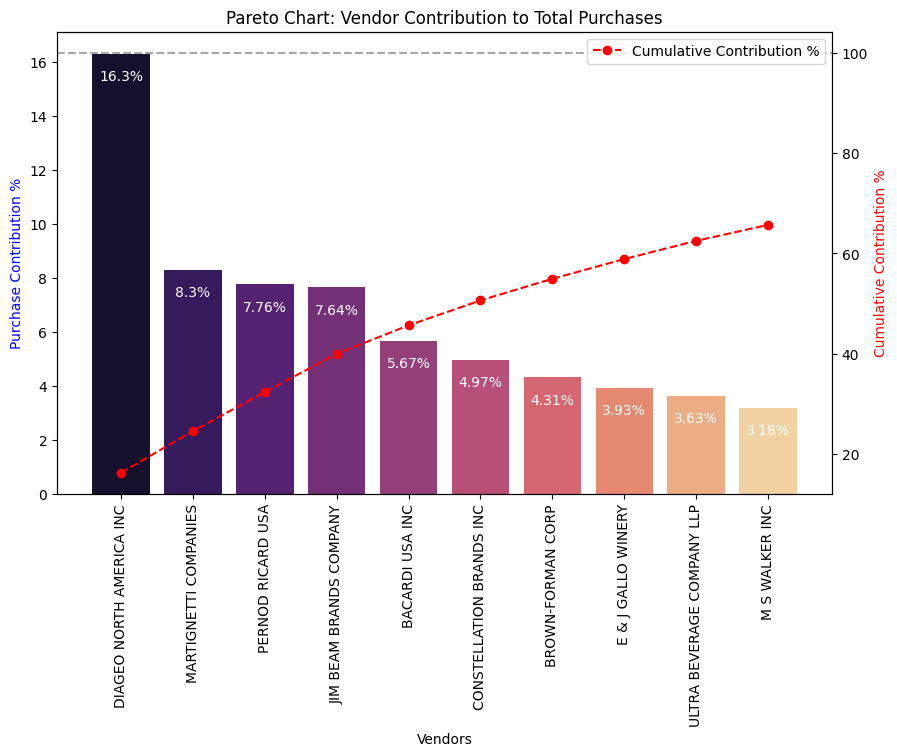

In [171]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PurchaseContribution%'],
    palette="magma",
    ax=ax1
)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(
        i, value - 1, str(value) + '%',  
        ha='center', fontsize=10, color='white'
    )

ax2 = ax1.twinx() 
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['CumultiveContribution%'],
    color='red', marker='o',
    linestyle='dashed', label='Cumulative Contribution %'
)

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)

ax2.legend(loc='upper right')

plt.show()


How much of total procurement is dependent on the top vendors?

In [172]:
print(f'Total procurement from top 10 vendors: {round(top_vendors["PurchaseContribution%"].sum(), 2)}%')

Total procurement from top 10 vendors: 65.69%


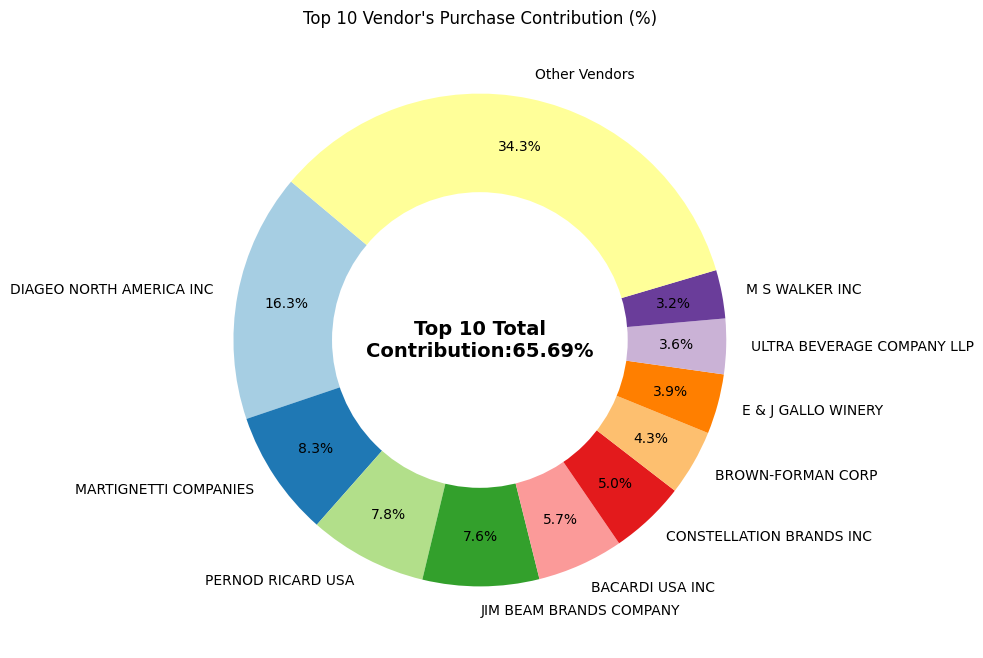

In [173]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)

total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%.1f%%',
                                  startangle=140, pctdistance=0.8, colors=plt.cm.Paired.colors)

centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0, 0, f"Top 10 Total\nContribution:{round(total_contribution, 2)}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

Does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost savings?

In [174]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [175]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [176]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'])

In [177]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean().reset_index()

,OrderSize,UnitPurchasePrice
0,Small,39.068186
1,Medium,15.486414
2,Large,10.777625


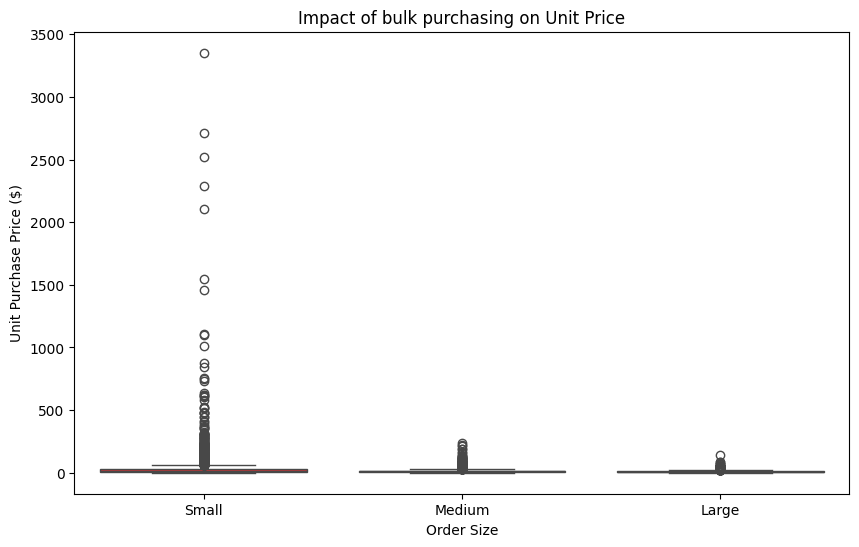

In [178]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OrderSize', y='UnitPurchasePrice', data=df, palette='Set1')
plt.title('Impact of bulk purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Unit Purchase Price ($)')
plt.show()

* Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
* The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
* This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

#### Which vendors have low inventory turnover, indicating excess stock and slow moving products?

In [179]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


##### how much capital is locked in unsold inventory and which vendors contribute most to it? 

In [180]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print(f'Unsold Capital: ${format_dollars(df["UnsoldInventoryValue"].sum())}')

Unsold Capital: $2.71M


In [181]:
inventory_val_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index().sort_values('UnsoldInventoryValue', ascending=False)
inventory_val_per_vendor['UnsoldInventoryValue'] = inventory_val_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_val_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


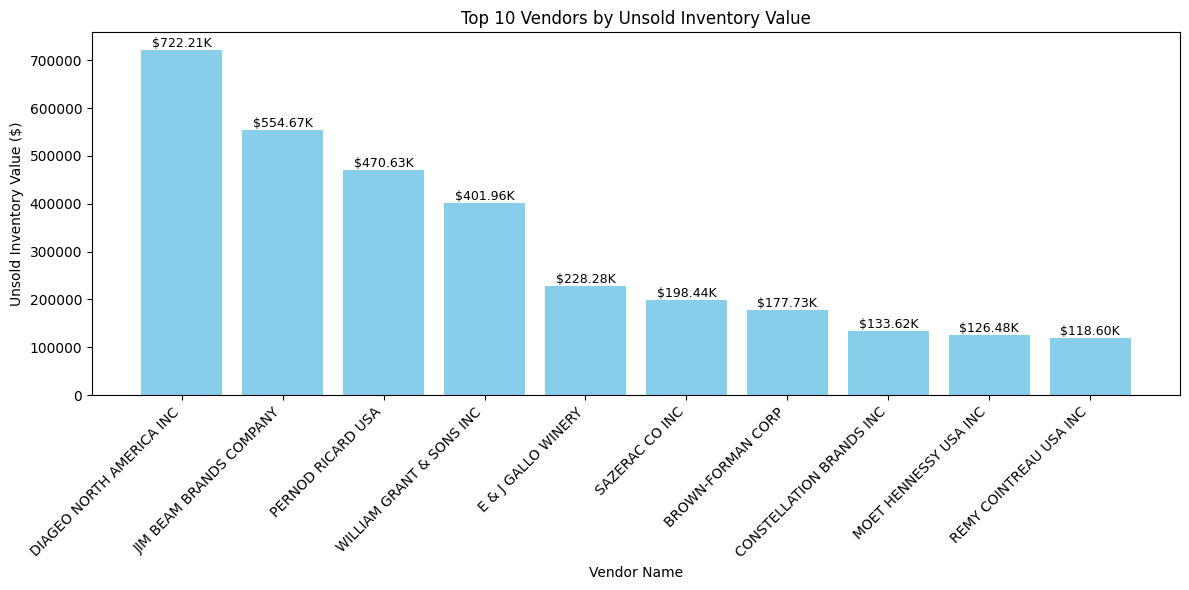

In [190]:
top_10_vendors = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index().sort_values('UnsoldInventoryValue', ascending=False).head(10)
plt.figure(figsize=(12, 6))
bars = plt.bar(
    top_10_vendors['VendorName'],
    top_10_vendors['UnsoldInventoryValue'],
    color='skyblue'
)
plt.xlabel('Vendor Name')
plt.ylabel('Unsold Inventory Value ($)')
plt.title('Top 10 Vendors by Unsold Inventory Value')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval,
        f'${format_dollars(yval)}',
        va='bottom',
        ha='center',
        fontsize=9
    )
plt.tight_layout()
plt.show()

#### What is the 95% confidance intervals for top performing and low performing vendors?

In [191]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [195]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [196]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean, mean - margin_of_error, mean + margin_of_error

Top Vendors Profit Margin: Mean=31.18, 95% CI=(30.74, 31.61)
Low Vendors Profit Margin: Mean=41.57, 95% CI=(40.50, 42.64)


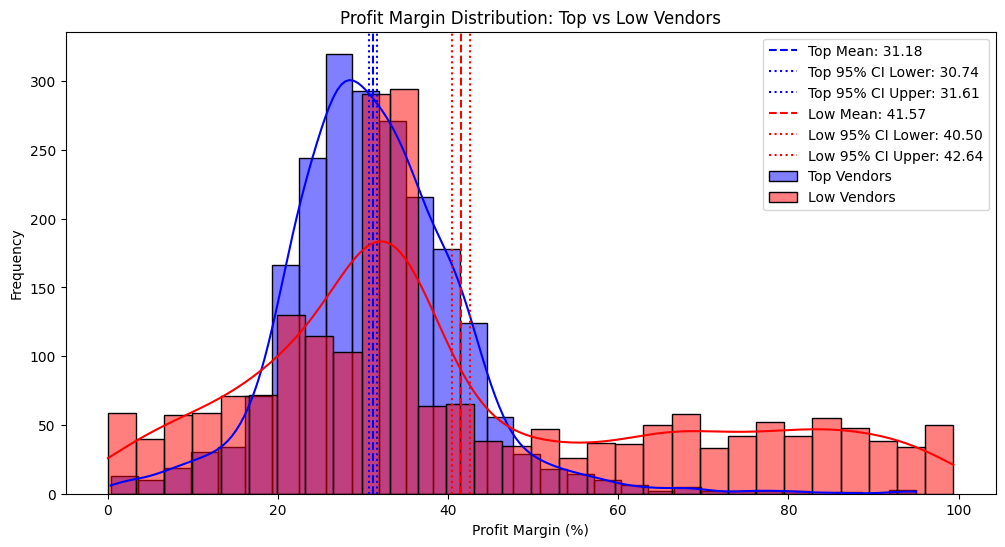

In [201]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors Profit Margin: Mean={top_mean:.2f}, 95% CI=({top_lower:.2f}, {top_upper:.2f})")
print(f"Low Vendors Profit Margin: Mean={low_mean:.2f}, 95% CI=({low_lower:.2f}, {low_upper:.2f})")

plt.figure(figsize=(12, 6))

sns.histplot(top_vendors, kde=True, color='blue', bins=30, alpha=0.5, label='Top Vendors')
plt.axvline(top_mean, color='blue', linestyle='--', label=f'Top Mean: {top_mean:.2f}')
plt.axvline(top_lower, color='blue', linestyle=':', label=f'Top 95% CI Lower: {top_lower:.2f}')
plt.axvline(top_upper, color='blue', linestyle=':', label=f'Top 95% CI Upper: {top_upper:.2f}')

sns.histplot(low_vendors, kde=True, color='red', bins=30, alpha=0.5, label='Low Vendors')
plt.axvline(low_mean, color='red', linestyle='--', label=f'Low Mean: {low_mean:.2f}')
plt.axvline(low_lower, color='red', linestyle=':', label=f'Low 95% CI Lower: {low_lower:.2f}')
plt.axvline(low_upper, color='red', linestyle=':', label=f'Low 95% CI Upper: {low_upper:.2f}')
plt.title('Profit Margin Distribution: Top vs Low Vendors')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).

This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.

For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.


## Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H0
​(Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H1
​(Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [203]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in profit margins.")
else:
    print("Fail to reject the null hypothesis: No significant difference in profit margins.")    

T-statistic: -17.6695, P-value: 0.0000
Reject the null hypothesis: Significant difference in profit margins.


Result: The null hypothesis is rejected, confirming that the two groups operate under distinctly different profitability models.

Implication: High-margin vendors may benefit from better pricing strategies, while top-selling vendors could focus on cost efficiency.

### Final Recommendations

* Re-evaluate pricing for low-sales, high-margin brands to boost sales volume without sacrificing profitability.
Diversify vendor partnerships to reduce dependency on a few suppliers and mitigate supply chain risks.

* Leverage bulk purchasing advantages to maintain competitive pricing while optimizing inventory management.

* Optimize slow-moving inventory by adjusting purchase quantities, launching clearance sales, or revising storage strategies.

* Enhance marketing and distribution strategies for low-performing vendors to drive higher sales volumes without compromising profit margins.

* By implementing these recommendations, the company can achieve sustainable profitability, mitigate risks, and enhance overall operational efficiency.